# Pat's Emotion Detector Training!

This document contains a series of notebooks containing what you need to train further iterations on my code if you desire.  Unsure if the refactored dataset will be evalable.

The highly modified dataset I used to train is available here https://github.com/patpragman/smile_tracker/blob/master/balanced_dataset.zip 

Download the dataset, and drop the zip file into google collab, you may have to comment out the first line in the script immediately below this:

In [ ]:
! cp /content/drive/MyDrive/balanced_dataset.zip /content/balanced_dataset.zip
! unzip /content/balanced_dataset.zip

Archive:  /content/balanced_dataset.zip
replace balanced/happy/happy_im3899.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# load from google drive - we'll need access to google drive later to save our models
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# now let's try k-means clustering for this 
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle  # this is useful for saving certain types of models

# preparation steps (we'll need these a lot)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# evaluation tools!
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix


In [ ]:
# variables we'll use frequently

original_image_size = (48, 48)  # original size of image
image_path = "/content/balanced"  # directory of images that have been unzipped in cell 1


[[1065 1164]
 [1112 1154]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.48      2229
           1       0.50      0.51      0.50      2266

    accuracy                           0.49      4495
   macro avg       0.49      0.49      0.49      4495
weighted avg       0.49      0.49      0.49      4495



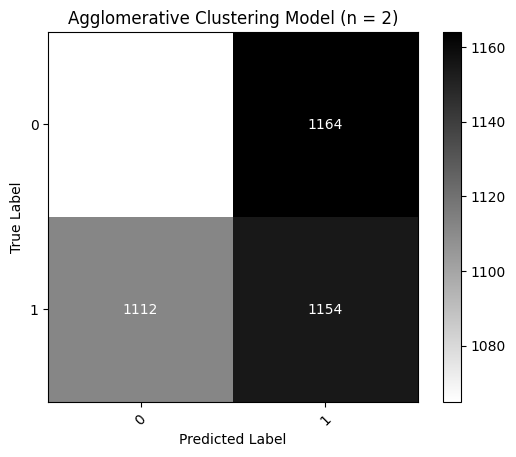

In [ ]:
"""
In This Cell We'll Do Agglomerative Clustering!  We tried K-Means, with similar results


"""
from sklearn.cluster import AgglomerativeClustering
from skimage import color, io

NUMBER_OF_CLUSTERS = 2

data = {"data": [],
        "value": []}
Y = []
for root, dirs, files in os.walk(image_path):
  for file in files:

    if ".PNG" in file.upper() or ".JPG" in file.upper():
      key = root.split("/")[-1]
      img = io.imread(f"{root}/{file}", as_gray=True)
      arr = np.asarray(img).reshape(np.prod(original_image_size), )  # flatten images
      data['data'].append(arr)

      # one-hot encoding
      val = None
      if key.upper() == "HAPPY":
        val = 0
      else:
        val = 1
    
      data['value'].append(val)


y = np.array(data['value'])
X = np.array(data['data'])


# now we've loaded all the X values into a single array
# and all the Y values into another one, let's do a train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42  # for consistency
                                                    )

model = AgglomerativeClustering(n_clusters=NUMBER_OF_CLUSTERS)
model.fit(X_train)

y_pred = model.fit_predict(X_test)

confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

# Evaluation
print(classification_report(y_test, y_pred))

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(NUMBER_OF_CLUSTERS)
plt.xticks(tick_marks, [str(i) for i in range(NUMBER_OF_CLUSTERS)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(NUMBER_OF_CLUSTERS)])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Agglomerative Clustering Model (n = {NUMBER_OF_CLUSTERS})')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[1022 1207]
 [1114 1152]]
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      2229
           1       0.49      0.51      0.50      2266

    accuracy                           0.48      4495
   macro avg       0.48      0.48      0.48      4495
weighted avg       0.48      0.48      0.48      4495



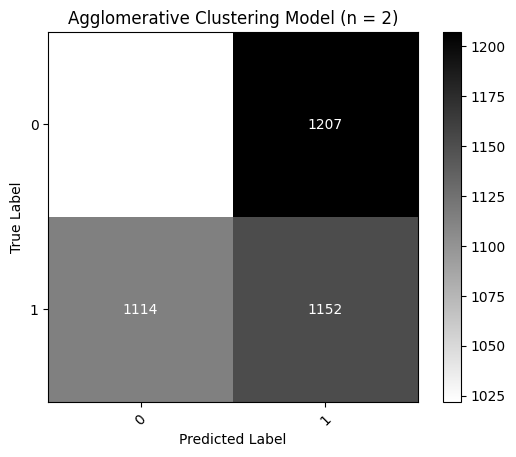

In [ ]:
"""
In This Cell We'll Do K-Means Clustering!


"""
from sklearn.cluster import KMeans
from skimage import color, io

NUMBER_OF_CLUSTERS = 2

data = {"data": [],
        "value": []}
Y = []
for root, dirs, files in os.walk(image_path):
  for file in files:

    if ".PNG" in file.upper() or ".JPG" in file.upper():
      key = root.split("/")[-1]
      img = io.imread(f"{root}/{file}", as_gray=True)
      arr = np.asarray(img).reshape(np.prod(original_image_size), )  # flatten images
      data['data'].append(arr)

      # one-hot encoding
      val = None
      if key.upper() == "HAPPY":
        val = 0
      else:
        val = 1
    
      data['value'].append(val)


y = np.array(data['value'])
X = np.array(data['data'])


# now we've loaded all the X values into a single array
# and all the Y values into another one, let's do a train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42  # for consistency
                                                    )

model = KMeans(n_clusters=NUMBER_OF_CLUSTERS)
model.fit(X_train)

y_pred = model.fit_predict(X_test)

confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

# Evaluation
print(classification_report(y_test, y_pred))

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(NUMBER_OF_CLUSTERS)
plt.xticks(tick_marks, [str(i) for i in range(NUMBER_OF_CLUSTERS)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(NUMBER_OF_CLUSTERS)])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Agglomerative Clustering Model (n = {NUMBER_OF_CLUSTERS})')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy: 0.6767519466073415
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      2266
           1       0.67      0.68      0.68      2229

    accuracy                           0.68      4495
   macro avg       0.68      0.68      0.68      4495
weighted avg       0.68      0.68      0.68      4495



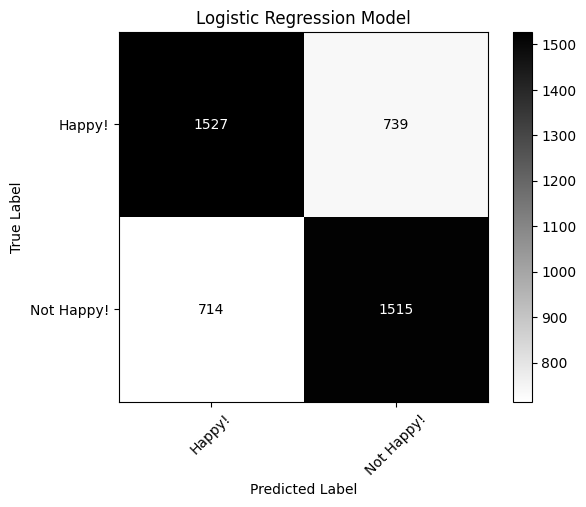

In [ ]:
# let's do logistic regression... I'll be kind of non-plussed if this ends up being better
from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()

data = []
Y = []
for root, dirs, files in os.walk(image_path):
  for file in files:
    if ".JPEG" in file.upper() or ".JPG" in file.upper() or ".PNG" in file.upper():
      key = root.split("/")[-1]
      img = io.imread(f"{root}/{file}", as_gray=True)
      arr = np.asarray(img).reshape(np.prod(original_image_size), )  # flatten
      data.append(arr)
      Y.append(1 if key.upper() == 'HAPPY' else 0)  # simple one hot encoding

y = np.array(Y)
X = np.array(data)

# now we've loaded all the X values into a single array
# and all the Y values into another one, let's do a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42  # for consistency
                                                    )

# fit the model with data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluate the model on the test set
print('Test accuracy:', accuracy_score(y_test, y_pred))

# confusion 

# Evaluation
print(classification_report(y_test, y_pred))
confusion_mtx = confusion_matrix(y_test, y_pred)

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Happy!', 'Not Happy!'], rotation=45)
plt.yticks(tick_marks, ['Happy!', 'Not Happy!'])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.title('Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# save the model
with open("logistic_regression.pkl", "wb") as file:
  pickle.dump(classifier, file)

Found 14384 images belonging to 2 classes.
Found 3594 images belonging to 2 classes.
Number of training samples in each class in the training set: {'else': 7192, 'happy': 7192}
Number of test samples in each class in the testing set: {'else': 1797, 'happy': 1797}
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_38 (Dropout)        (None, 48, 48, 1)         0         
                                                                 
 conv2d_54 (Conv2D)          (None, 12, 12, 512)       2560      
                                                                 
 batch_normalization_41 (Bat  (None, 12, 12, 512)      2048      
 chNormalization)                                                
                                                                 
 conv2d_55 (Conv2D)          (None, 12, 12, 256)       524544    
                                                     

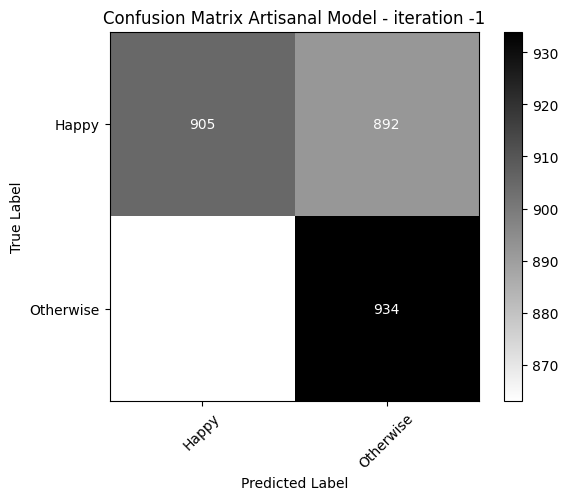

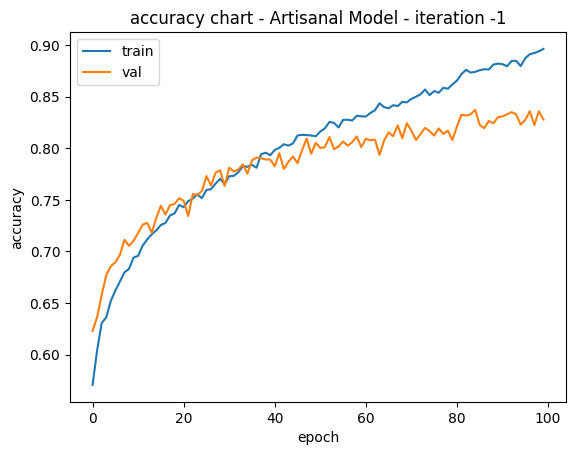

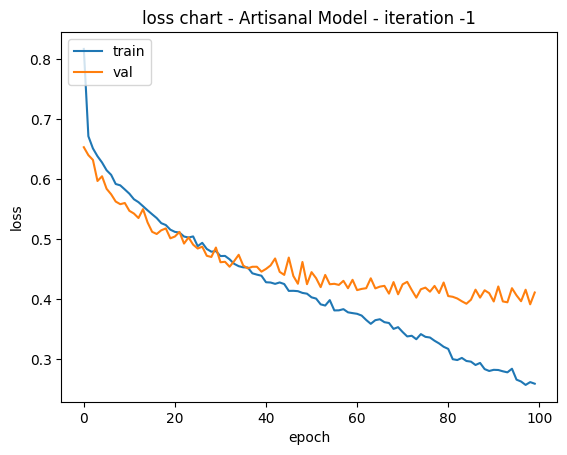

In [34]:
"""
Convolutional Neural Network Model!
"""

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.metrics import binary_accuracy

seed = 415  # seed is the same for replicability
batch_size = 16
target_image_size = (48, 48)  # change this if you want to scale the images, etc.
image_channels = 1  # this is because we only have grayscale images
epochs = 100  # adjust as desired
optimizer = 'sgd'  # I found that SGD worked the best by trial and error

model_name = "Artisanal Model"
iteration = 1  # adjust upward each time you change the model

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,
                             zoom_range = 0.1, # Randomly zoom image 
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,
                             rotation_range=10
                             )


# I changed the imagery to grayscale to speed up the training process
train_generator = datagen.flow_from_directory(
    image_path,
    target_size=target_image_size,  # resize for alexnet or something else if you need to
    batch_size=batch_size,
    subset='training',
    color_mode="grayscale",
    )

test_generator = datagen.flow_from_directory(
    image_path,
    target_size=target_image_size,  # resize for alexnet or something else if you need to
    batch_size=batch_size,
    subset='validation',
    color_mode="grayscale",
    )


train_class_counts = train_generator.classes
test_class_counts = test_generator.classes

train_class_count = dict(zip(train_generator.class_indices.keys(), np.zeros(len(train_generator.class_indices), dtype=int)))
test_class_count = dict(zip(test_generator.class_indices.keys(), np.zeros(len(test_generator.class_indices), dtype=int)))


for label in train_class_counts:
    train_class_count[list(train_generator.class_indices.keys())[int(label)]] += 1
    
for label in test_class_counts:
    test_class_count[list(test_generator.class_indices.keys())[int(label)]] += 1

# Status Print Out so what's happening is more understandable
print('Number of training samples in each class in the training set:', train_class_count)
print('Number of test samples in each class in the testing set:', test_class_count)

# If the data is unbalanced, you can derive weights here
from collections import Counter
counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}                     

"""
All the callbacks go here

Be advised, ModelCheckpoint is slow in google collab
"""

my_callbacks = [
    EarlyStopping(monitor="val_categorical_accuracy", 
                  patience=15,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_categorical_accuracy", 
                      factor=0.50, patience=10, 
                      verbose=1,
                      min_delta=0.0001),
    #ModelCheckpoint(filepath=f'/content/drive/MyDrive/checkpoints/{model_name}.{epoch:02d}-{val_categorical_accuracy:.2f}.h5', save_best_only=True),
]

# Some HyperParameter Settings - Currently Unused
dropout_value = 0.01
conv_layer_filter_count = 128

# activation function selection here
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.01)
activation = leaky_relu

input_shape = (target_image_size[0], target_image_size[1], image_channels)

model = Sequential([
    # entry point
    Dropout(0.05),

    Conv2D(filters=512, kernel_size=(2,2), 
           strides=(4,4),
           
           activation=activation, 
           input_shape=input_shape, # resize to input shape
           ),
    BatchNormalization(),


    Conv2D(filters=256, 
           kernel_size=(2,2), 
           strides=(1,1), 
           activation=activation, 
           padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), 
                 strides=(1,1)),  # extract feature set


    # this is kind of like a reduced parameter alexnet?
    Conv2D(filters=128, kernel_size=(2,2), strides=(1,1), activation=activation, padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2),),  # extract 3rd feature set


    Flatten(),

    # note how this is much smaller than AlexNet
    Dense(1024, activation=activation),
    Dropout(0.5),


    Dense(2, activation='softmax'),  # only 2 choices here
])



# build and compile the model
model.build(input_shape=(None, *input_shape))
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=['categorical_accuracy']
              )

# print out the summary - this is useful because if you get the dimensions wrong you can see it before it starts
print(model.summary())

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=my_callbacks
)

model.save(f"/content/drive/MyDrive/{model_name}_iteration-{iteration}.h5")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_actual = test_generator.classes

# should round to 0 or 1...
y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred,axis=1)


confusion_mtx = confusion_matrix(y_actual, y_pred)
print(confusion_mtx)

# Evaluation
print(classification_report(test_generator.classes, y_pred))

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

# manually set - could be better
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Happy', 'Otherwise'], rotation=45)
plt.yticks(tick_marks, ['Happy', 'Otherwise'])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix {model_name} - iteration -{iteration}')

plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title(f'accuracy chart - {model_name} - iteration -{iteration}')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'loss chart - {model_name} - iteration -{iteration}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# VGG16 Implementation

The pretrained model below I trained for over a day last week.  I didn't have great results, but when I cleaned up the code above I re-ran it only to 30 epochs so I could show you how it works and you could see output.

Found 14384 images belonging to 2 classes.
Found 3594 images belonging to 2 classes.
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_20 (Flatten)        (None, 25088)             0         
                                                                 
 dense_41 (Dense)            (None, 4096)              102764544 
                                                                 
 dropout_40 (Dropout)        (None, 4096)              0         
                                                                 
 dense_42 (Dense)            (None, 64)                262208    
                                                                 
 dropout_41 (Dropout)        (None, 64)                0         
                                  

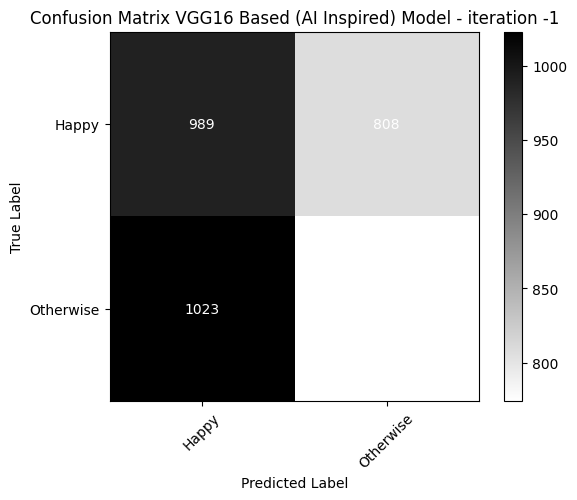

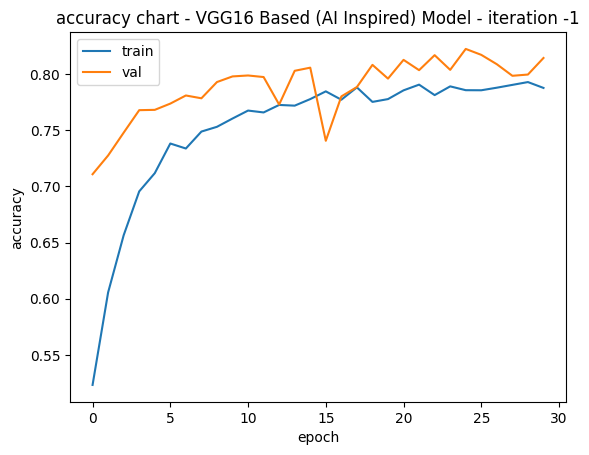

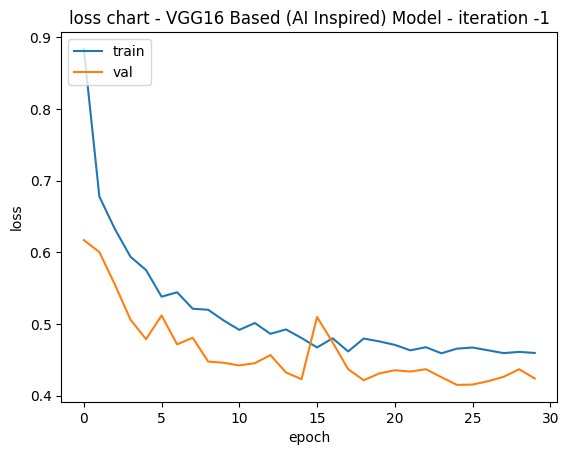

In [35]:
# new AI suggested model
# Load VGG16 model without the top layer
from tensorflow.keras.applications.vgg16 import VGG16

seed = 415
batch_size = 32
target_image_size = (224, 224)  # do not change, otherwise won't work
image_channels = 3  # this is because we only have grayscale images
epochs = 30  # adjust as desired

model_name = "VGG16 Based (AI Inspired) Model"
iteration = 1  # adjust upward each time you change the model

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2,
                              zoom_range = 0.1, # Randomly zoom image 
                              width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                              height_shift_range=0.1,
                             rotation_range=10
                             )


# I changed the imagery to grayscale to speed up the training process
train_generator = datagen.flow_from_directory(
    image_path,
    target_size=target_image_size,  # resize for alexnet or something else if you need to
    batch_size=batch_size,
    subset='training',
    )

test_generator = datagen.flow_from_directory(
    image_path,
    target_size=target_image_size,  # resize for alexnet or something else if you need to
    batch_size=batch_size,
    subset='validation',
    )



base_model = VGG16(weights='imagenet', 
                   include_top=False, 
                   input_shape=(*target_image_size, image_channels))


# Freeze the convolutional layers of the base model
for layer in base_model.layers:
  layer.trainable = False

# Add custom layers on top of the base model
model = Sequential([
    base_model,

    Flatten(),

    Dense(4096, activation=activation),
    Dropout(0.5),

    Dense(64, activation=activation),
    Dropout(0.5),

    Dense(2, activation="softmax")
])


# Build and Compile the Model!
model.compile(optimizer='adam', 
              loss="categorical_crossentropy",
              metrics=['categorical_accuracy']
              )
print(model.summary())



# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=my_callbacks
)

model.save(f"/content/drive/MyDrive/{model_name}_iteration-{iteration}.h5")

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_actual = test_generator.classes


# should round to 0 or 1...
y_pred = np.round(y_pred)
y_pred = np.argmax(y_pred,axis=1)

confusion_mtx = confusion_matrix(y_actual, y_pred)
print(confusion_mtx)

# Evaluation
print(classification_report(test_generator.classes, y_pred))

plt.imshow(confusion_mtx, cmap='binary', interpolation='nearest')
plt.colorbar()

# manually set - could be better
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Happy', 'Otherwise'], rotation=45)
plt.yticks(tick_marks, ['Happy', 'Otherwise'])

thresh = confusion_mtx.max() / 2.
for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, format(confusion_mtx[i, j]), ha="center", va="center", color="white" if confusion_mtx[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix {model_name} - iteration -{iteration}')

plt.show()

plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title(f'accuracy chart - {model_name} - iteration -{iteration}')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'loss chart - {model_name} - iteration -{iteration}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
